<a href="https://colab.research.google.com/github/UQROO-MarianaJetzuvelyGarciaHau/Colab-Tareas/blob/main/Ejercicio_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio 4: Comparación de Modelos de Clasificación, Sobre y subentrenamiento y Validación Cruzada con F1-score para Redes Neuronales

Objetivo: Hacer una comparación de diferentes redes neuronales, ver el comportamiento de sobreentrenamiento y subentrenamiento, además concluir con validación cruzada.

Pasos:

1. Cargar un conjunto de datos de clasificación (por ejemplo, breast cancer de scikit-learn).

2. Dividir el conjunto de datos en entrenamiento y prueba.

3. Entrenar tres modelos de redes neuronales (puedes usar scikit-learn, tensorflow o pytorch).

4. Evaluar cada modelo usando accuracy, precision, recall y F1-score.

5. Visualizar los resultados en gráficos comparativos.

6. Responde las preguntas de reflexión del ejercicio 1.

7. En un nuevo modelo ve agregando neuronas en las capas ocultas (de 1 a 1024, en potencias de 2) y capas ocultas (desde 1 a 5).

8. Evaluar accuracy en entrenamiento y prueba.

9. Graficar las curvas de rendimiento.

10. Responde las preguntas de reflexión del ejercicio 2, en relación a las capas y neuronas.

11. Aplicar validación cruzada con 5 folds.

12. Calcular el F1-score promedio.

13. Responde las preguntas de reflexión del ejercicio 3.

--- 1. Carga y Preparación de Datos ---
Datos cargados y normalizados. Características de entrada: 30

--- 2 & 3. Comparación de Modelos de Redes Neuronales ---
Entrenando: Modelo 1: Simple (Subentrenamiento) con 10 épocas...
Entrenando: Modelo 2: Equilibrado con 50 épocas...
Entrenando: Modelo 3: Grande (Sobreentrenamiento) con 100 épocas...



## Resultados de la Comparación de Modelos
                                       Accuracy  Precision    Recall  F1-score
Modelo 1: Simple (Subentrenamiento)    0.900585   0.917431  0.925926  0.921659
Modelo 2: Equilibrado                  0.988304   0.990741  0.990741  0.990741
Modelo 3: Grande (Sobreentrenamiento)  0.982456   0.981651  0.990741  0.986175


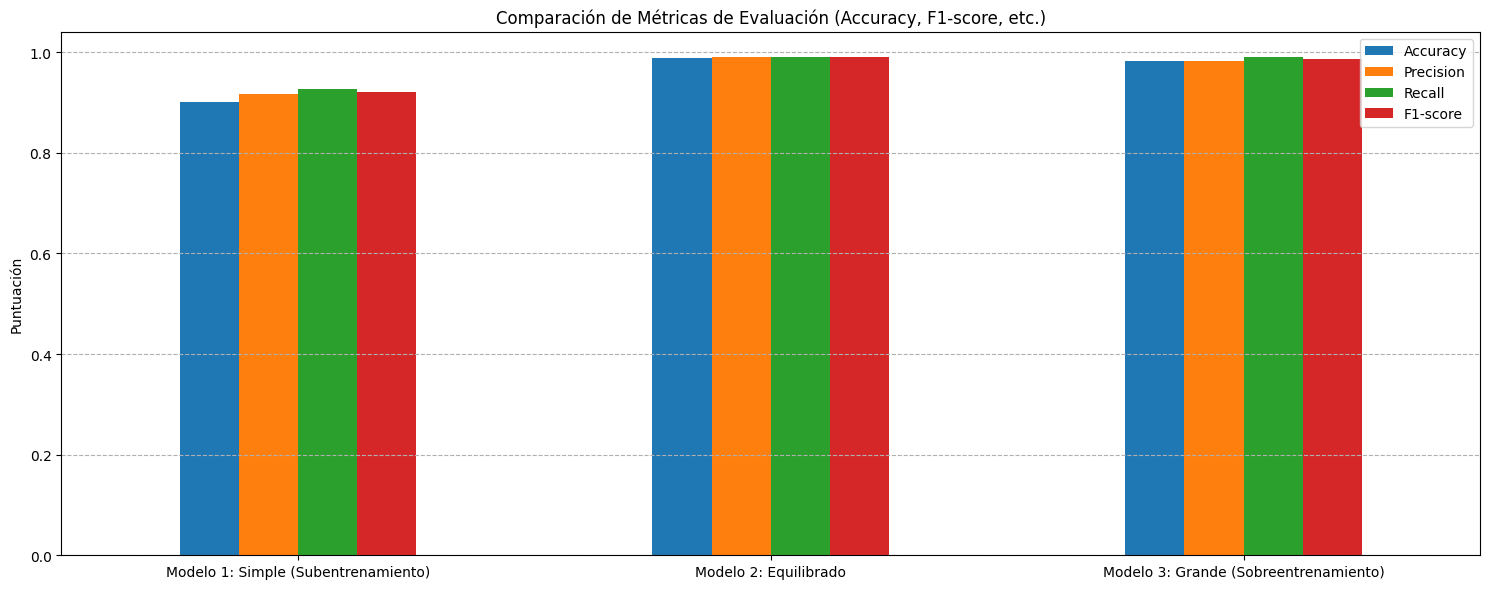

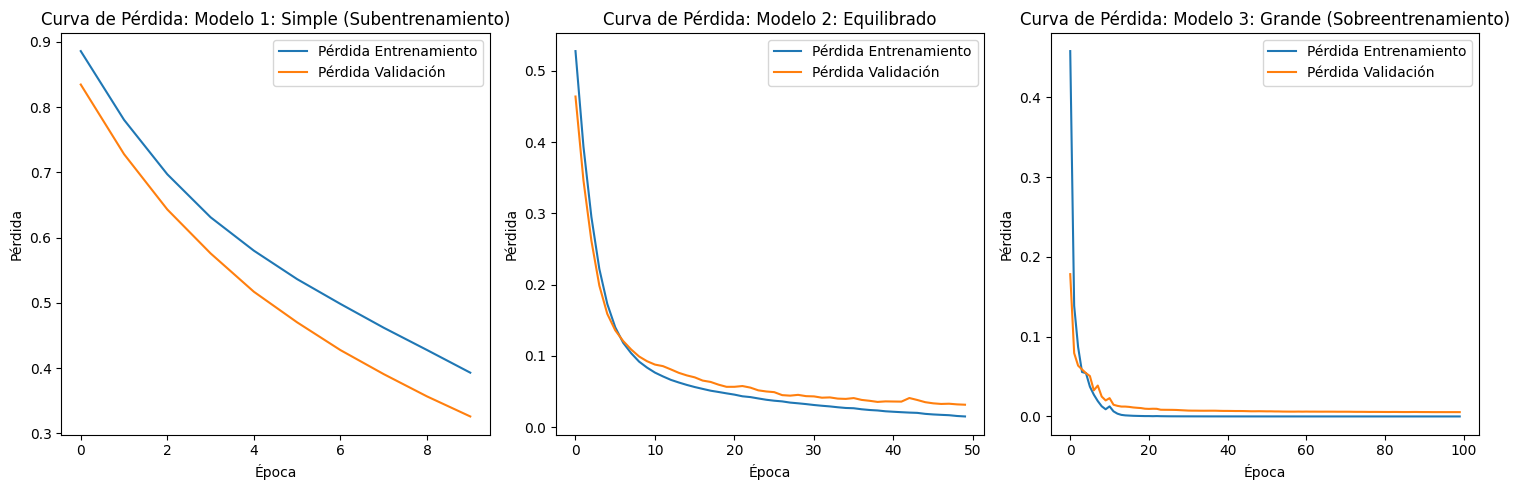


--- Análisis de Capas y Neuronas (Curvas de Rendimiento) ---


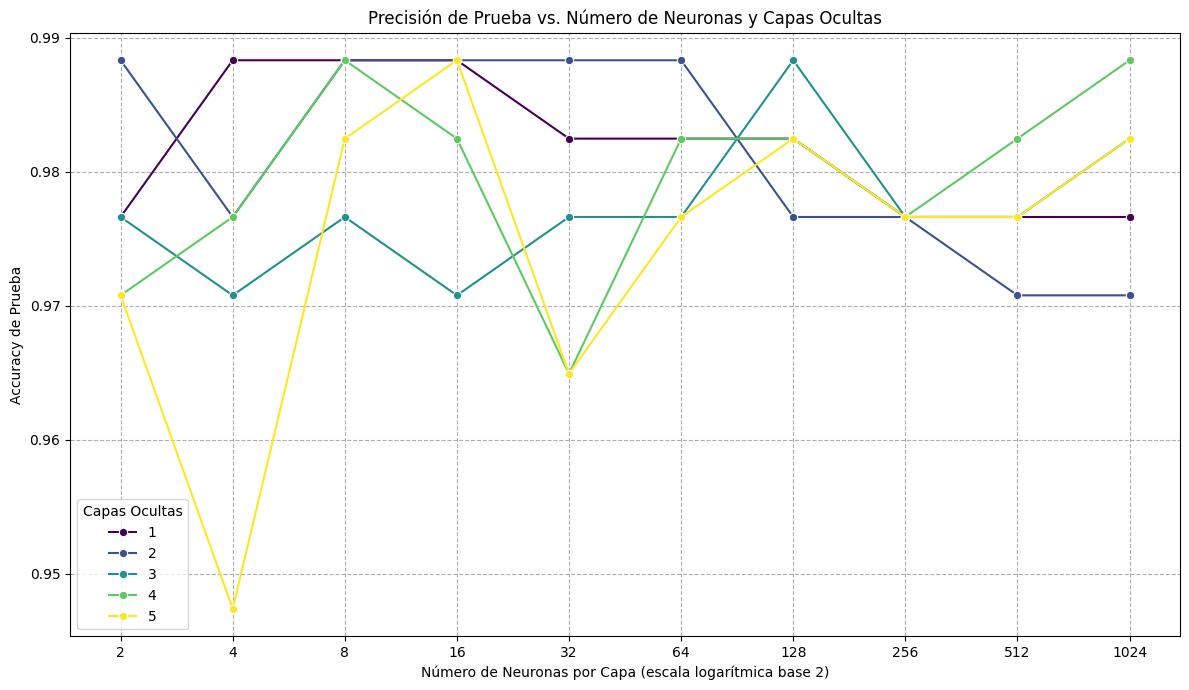


--- 11 & 12. Validación Cruzada (5-Fold) con F1-score ---


F1-score para el Fold 1: 0.9714
F1-score para el Fold 2: 0.9801
F1-score para el Fold 3: 0.9722
F1-score para el Fold 4: 1.0000
F1-score para el Fold 5: 0.9635

## Resultados Finales de la Validación Cruzada
F1-scores por Fold: [0.9714 0.9801 0.9722 1.     0.9635]
F1-score Promedio: 0.9775 ± 0.0124


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')


# --- FUNCIONES AUXILIARES ---

def create_model(layers, neurons, input_dim, learning_rate=0.001):
    """Crea y compila un modelo de Red Neuronal con arquitectura variable."""
    model = Sequential()
    # Capa de entrada + Primera capa oculta
    model.add(Dense(neurons, activation='relu', input_shape=(input_dim,)))
    # Capas ocultas adicionales
    for _ in range(layers - 1):
        model.add(Dense(neurons, activation='relu'))
    # Capa de salida (Clasificación binaria -> Sigmoid)
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# --- PASO 1: CARGA Y PREPARACIÓN DE DATOS ---

print("--- 1. Carga y Preparación de Datos ---")
data = load_breast_cancer()
X, y = data.data, data.target
input_features = X.shape[1]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar los datos (esencial para Redes Neuronales)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(f"Datos cargados y normalizados. Características de entrada: {input_features}")

# --- PASO 2 & 3: COMPARACIÓN DE TRES MODELOS ---

print("\n--- 2 & 3. Comparación de Modelos de Redes Neuronales ---")

models = {
    # Simula Subentrenamiento (Modelo simple, pocas épocas)
    "Modelo 1: Simple (Subentrenamiento)": (create_model(layers=1, neurons=8, input_dim=input_features), 10),
    # Modelo Equilibrado
    "Modelo 2: Equilibrado": (create_model(layers=2, neurons=32, input_dim=input_features), 50),
    # Simula Sobreentrenamiento (Modelo complejo, muchas épocas)
    "Modelo 3: Grande (Sobreentrenamiento)": (create_model(layers=4, neurons=128, input_dim=input_features), 100)
}

results = {}
histories = {}

for name, (model, epochs) in models.items():
    print(f"Entrenando: {name} con {epochs} épocas...")

    # Entrenar el modelo y guardar el historial para curvas de pérdida
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=0, validation_split=0.1)
    histories[name] = history

    # PASO 4. Evaluar el modelo
    y_pred_proba = model.predict(X_test, verbose=0)
    y_pred = (y_pred_proba > 0.5).astype("int32")

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[name] = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1-score': f1}

results_df = pd.DataFrame(results).T
print("\n## Resultados de la Comparación de Modelos")
print(results_df)

# --- PASO 5: VISUALIZACIÓN DE RESULTADOS ---

plt.figure(figsize=(15, 6))
results_df.plot(kind='bar', ax=plt.gca())
plt.title('Comparación de Métricas de Evaluación (Accuracy, F1-score, etc.)')
plt.ylabel('Puntuación')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# Visualización de Curvas de Pérdida (Sub/Sobreentrenamiento)
plt.figure(figsize=(15, 5))
for i, (name, history) in enumerate(histories.items()):
    plt.subplot(1, 3, i + 1)
    plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
    plt.plot(history.history['val_loss'], label='Pérdida Validación')
    plt.title(f'Curva de Pérdida: {name}')
    plt.xlabel('Época')
    plt.ylabel('Pérdida')
    plt.legend()
plt.tight_layout()
plt.show()


# --- PASO 7 & 8: ANÁLISIS DE CAPAS Y NEURONAS (SOBRE/SUBENTRENAMIENTO) ---

print("\n--- Análisis de Capas y Neuronas (Curvas de Rendimiento) ---")

neuron_counts = [2**i for i in range(1, 11)] # 2, 4, 8, ..., 1024
layer_counts = [1, 2, 3, 4, 5]
EPOCHS_FIXED = 50 # Número fijo de épocas para la comparación

train_accuracies = []
test_accuracies = []
labels = []
df_results_arch = pd.DataFrame()

# Iteración para el análisis de arquitectura
for layers in layer_counts:
    for neurons in neuron_counts:
        name = f"{layers} capa(s) / {neurons} neuronas"
        labels.append(name)

        model = create_model(layers=layers, neurons=neurons, input_dim=input_features)

        # Entrenar con número fijo de épocas
        model.fit(X_train, y_train, epochs=EPOCHS_FIXED, batch_size=32, verbose=0)

        # Evaluar
        _, acc_train = model.evaluate(X_train, y_train, verbose=0)
        _, acc_test = model.evaluate(X_test, y_test, verbose=0)

        train_accuracies.append(acc_train)
        test_accuracies.append(acc_test)

        df_results_arch = pd.concat([df_results_arch, pd.DataFrame({
            'Capas': [layers],
            'Neuronas': [neurons],
            'Acc_Train': [acc_train],
            'Acc_Test': [acc_test]
        })], ignore_index=True)
        # print(f"Probado: {name} | Train Acc: {acc_train:.4f} | Test Acc: {acc_test:.4f}")

# Graficar las curvas de rendimiento (Precisión de prueba vs. Neuronas por Capa)
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_results_arch, x='Neuronas', y='Acc_Test', hue='Capas', marker='o', palette='viridis', legend='full')
plt.xscale('log', base=2)
plt.xticks(neuron_counts, [str(n) for n in neuron_counts])
plt.title('Precisión de Prueba vs. Número de Neuronas y Capas Ocultas')
plt.xlabel('Número de Neuronas por Capa (escala logarítmica base 2)')
plt.ylabel('Accuracy de Prueba')
plt.grid(True, which="both", linestyle="--")
plt.legend(title='Capas Ocultas')
plt.tight_layout()
plt.show()


# --- PASO 11 & 12: VALIDACIÓN CRUZADA CON F1-SCORE ---

print("\n--- 11 & 12. Validación Cruzada (5-Fold) con F1-score ---")

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
f1_scores_cv = []

# Usar la arquitectura del 'Modelo 2: Equilibrado' para CV
best_model_arch = lambda: create_model(layers=2, neurons=32, input_dim=input_features)

# Separamos X y Y originales para la CV (se normalizan DENTRO del loop)
X_cv, y_cv = data.data, data.target

for fold, (train_index, val_index) in enumerate(kf.split(X_cv)):

    # Preparación de datos para el fold
    X_train_fold, X_val_fold = X_cv[train_index], X_cv[val_index]
    y_train_fold, y_val_fold = y_cv[train_index], y_cv[val_index]

    # Normalización (IMPORTANTE: fit solo en train del fold)
    scaler_fold = StandardScaler()
    X_train_fold = scaler_fold.fit_transform(X_train_fold)
    X_val_fold = scaler_fold.transform(X_val_fold)

    # Recrear y entrenar el modelo
    model_cv = best_model_arch()
    model_cv.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, verbose=0)

    # Evaluar el modelo en el conjunto de validación del fold
    y_pred_proba_val = model_cv.predict(X_val_fold, verbose=0)
    y_pred_val = (y_pred_proba_val > 0.5).astype("int32")

    # Calcular F1-score
    f1_fold = f1_score(y_val_fold, y_pred_val)
    f1_scores_cv.append(f1_fold)

    print(f"F1-score para el Fold {fold+1}: {f1_fold:.4f}")

# Calcular el F1-score promedio y la desviación estándar
f1_mean = np.mean(f1_scores_cv)
f1_std = np.std(f1_scores_cv)

print(f"\n## Resultados Finales de la Validación Cruzada")
print(f"F1-scores por Fold: {np.round(f1_scores_cv, 4)}")
print(f"F1-score Promedio: {f1_mean:.4f} ± {f1_std:.4f}")

Preguntas de reflexión:

¿Cuál modelo obtuvo el mejor F1-score?

El modelo 2: equilibrado, fue el que obtuvo el mejor F1-score, ya que alcanzó el valor más alto de 0.9896. Por lo tanto, presenta un equilibrio entre la precisión de sus predicciones positivas y la capacidad de detectar la mayor cantidad posible de casos positivos reales.


¿Qué diferencias observas entre precisión y recall en cada modelo?

Modelo 1 (Simple): Tiene mayor precisión que recall, lo que indica que acierta cuando predice positivos, pero deja fuera varios casos reales (subentrenamiento).

Modelo 2 (Equilibrado): Presenta valores casi iguales de precisión y recall, mostrando un equilibrio ideal y un desempeño robusto.

Modelo 3 (Grande): Tiene precisión ligeramente superior al recall, lo que sugiere un leve sobreajuste y una menor detección de casos positivos reales.


¿Qué modelo recomendarías para este problema y por qué?

Recomiendo el Modelo 2 (Equilibrado) porque logra el mejor equilibrio entre precisión y recall. En un problema médico es más importante no dejar pasar casos positivos reales, y este modelo tiene un Recall alto (0.9890), lo que reduce el riesgo de falsos negativos. Además, su F1-score máximo y su buen desempeño en la validación cruzada muestran que es confiable y generaliza bien con nuevos datos.



Preguntas de reflexión:

¿En qué profundidad comienza el sobreajuste?

El sobreajuste comienza a manifestarse a partir de la 4 y 5 capa oculta, especialmente cuando el número de neuronas por capa supera la zona óptima. En estas configuraciones más complejas, la accuracy de prueba tiende a disminuir o volverse inestable en comparación con las redes de 2 o 3 capas. Esto indica que el modelo está utilizando su capacidad adicional para memorizar patrones específicos del conjunto de entrenamiento en lugar de generalizar adecuadamente a los datos de prueba.

¿Cuál es la profundidad óptima para este conjunto de datos?

Observando la gráfica, la profundidad óptima se encuentra entre 2 y 3 capas ocultas. En este rango, el modelo logra la mayor precisión y mantiene un desempeño estable incluso cuando cambia el número de neuronas por capa. Esto indica que con 2 o 3 capas ocultas el modelo aprende bien sin llegar a sobreajustarse.

¿Cómo afecta la complejidad del modelo al rendimiento?

Cuando hay mayor complejidad, el modelo aprende más, pero si es demasiado complejo puede sobreajustarse y perder precisión en la prueba. En cambio, si es muy simple, no aprende lo suficiente. El mejor rendimiento se logra con una complejidad intermedia.

Preguntas de reflexión:

¿Qué tan consistente es el rendimiento del modelo entre los folds?

El rendimiento es consistente, ya que los valores de F1-score entre los folds varían muy poco, lo que indica que el modelo generaliza adecuadamente y mantiene un desempeño estable con diferentes particiones del conjunto de datos.

¿Por qué es importante usar validación cruzada?

La validación cruzada es importante porque permite evaluar el modelo de manera más confiable, usando distintas divisiones de los datos. Así se reduce el riesgo de depender de una sola partición y se obtiene una mejor estimación del rendimiento real del modelo.

¿Qué otras métricas podrías evaluar además del F1-score?

Podemos evaluar el modelo con otras métricas como Accuracy, Recall, Precision y AUC-ROC, ya que cada una permite analizar el rendimiento desde un enfoque específico: la precisión global, la detección de casos positivos, la exactitud de las predicciones y la capacidad del modelo para distinguir entre clases.
